In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv('/content/drive/MyDrive/ML/Breast_cancer_dataset.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

<Axes: ylabel='diagnosis'>

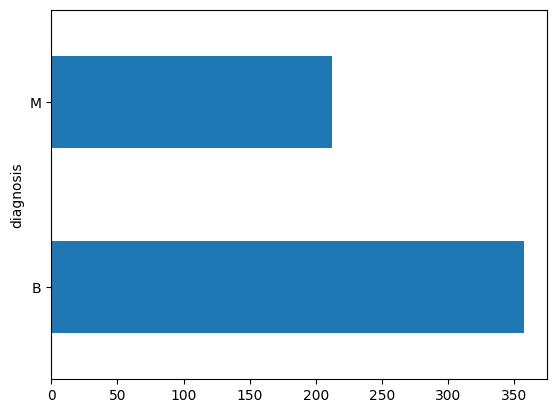

In [9]:
df.diagnosis.value_counts().plot.barh()

In [10]:
M_df=df[(df.diagnosis=='M')]
B_df=df[(df.diagnosis=='B')]

print(f'M df: {M_df.shape}')
print(f'B df: {B_df.shape}')

M df: (212, 33)
B df: (357, 33)


<Axes: >

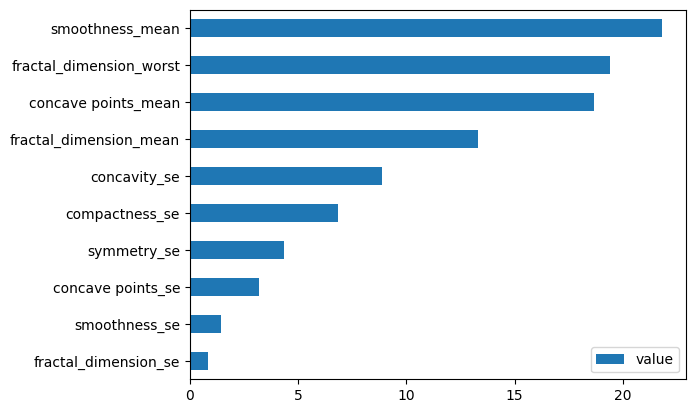

In [15]:
def create_result_df(df):
    result_df = df.T.drop(['diagnosis', 'Unnamed: 32']).sum(axis=1).to_frame('value')
    result_df = result_df[(result_df.T != 0).any()]
    result_df = result_df.sort_values(by='value', ascending=True)
    return result_df

M_result_df = create_result_df(M_df)

M_result_df.head(10).plot.barh()


<Axes: >

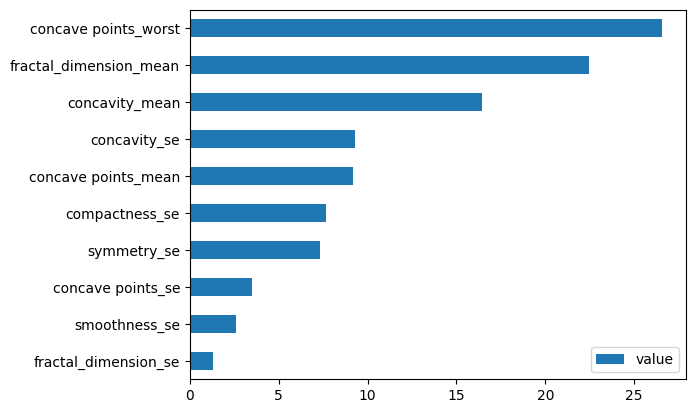

In [16]:
B_result_df = create_result_df(B_df)

B_result_df.head(10).plot.barh()

In [19]:
feature_df=df.drop(['diagnosis','Unnamed: 32','fractal_dimension_mean','compactness_se','symmetry_se','concave points_se','smoothness_se','fractal_dimension_se','concave points_mean'],axis=1)
labels_df=df.diagnosis
feature_df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,1.0950,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.5435,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.7456,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.4956,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.7572,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
transformed_feature_df,transformed_label_df=oversample.fit_resample(feature_df,labels_df)

print(f'new label count: {transformed_label_df.value_counts()}')
print(f'old label count: {labels_df.value_counts()}')

new label count: diagnosis
M    357
B    357
Name: count, dtype: int64
old label count: diagnosis
B    357
M    212
Name: count, dtype: int64


In [21]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report


In [38]:
X_train, X_test, y_train, y_test= train_test_split(transformed_feature_df,transformed_label_df, test_size=0.3)

lr=LogisticRegression(solver='liblinear')

model=lr.fit(X_train, np.ravel(y_train))

accuracy=model.score(X_test,y_test)
print(accuracy)

0.5209302325581395


In [39]:
print(f'Result: {X_test.iloc[50][X_test.iloc[50]!=0].keys()}')
print(f'Diagnosis: {y_test.iloc[50]}')


Result: Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'symmetry_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se',
       'concavity_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')
Diagnosis: B


In [41]:
test = X_test.iloc[50].values.reshape(-1,1).T
proba=model.predict_proba(test)
classes=model.classes_
resultdf=pd.DataFrame(data=proba,columns=classes)
toppred=resultdf.T.sort_values(by=[0], ascending=[False])
toppred.head()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,0
M,0.523361
B,0.476639


In [45]:
from sklearn.metrics import precision_score


y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred,zero_division=0))

              precision    recall  f1-score   support

           B       0.00      0.00      0.00       103
           M       0.52      1.00      0.69       112

    accuracy                           0.52       215
   macro avg       0.26      0.50      0.34       215
weighted avg       0.27      0.52      0.36       215

